<a href="https://colab.research.google.com/github/deepakshimpi001/DATA-SCIENCE-ASSIGNMENT/blob/main/Emotion_mining_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [61]:
reviews=pd.read_csv("/content/reviews.csv",index_col=0)
reviews.head()

,comment
0,\n\n I am writing this review after 40 days o...
1,"\n\n After thinking a lot, I decided to go ah..."
2,\n\n\n\n\n The media could ...
3,\n\n 1st thing is there is no USB adapterI.e....
4,\n\n Same like the old classic iphone 5 lookB...


In [62]:
reviews.isnull().sum()

comment    2
dtype: int64

In [63]:
reviews.shape

(240, 1)

In [64]:
reviews=reviews.dropna()
reviews.shape

(238, 1)

In [65]:
# remove both the leading and the trailing characters
reviews=[comment.strip() for comment in reviews.comment] 
# remove empty strings, because they are considered in Python as False
reviews=[comment for comment in reviews if comment] 
reviews[0:5]

['I am writing this review after 40 days of use of iPhone 12. phone camera is excellent like DSLR ,very fast processor ,face ID feature looks great ,overall everything is fine but only issue which this phone has is , battery draining too fast. You can use 100% battery only for 5-6 hours of continuous use after that you have to charge it. Apple should look into this.',
 'After thinking a lot, I decided to go ahead with iPhone 12. The original price is ₹ 84900. After credit card discount(₹6000), old phone exchange(₹3450) and reward points money(₹4530) inclusion, I bought it for ₹70920. There’s also an additional 3000 discount on red and white variants but I couldn’t let go of blue1. PRICE: Considering iPhone 11 would be supported by iOS for 4 years, based on the current price it’d cost 13k per year and iPhone 12 for 5 years would cost 14.9k(excluding exchange discount) per year. For me price gap for both phones didn’t seem to make a huge difference as IPhone 11 is already an year old and

In [66]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I am writing this review after 40 days of use of iPhone 12. phone camera is excellent like DSLR ,very fast processor ,face ID feature looks great ,overall everything is fine but only issue which this phone has is , battery draining too fast. You can use 100% battery only for 5-6 hours of continuous use after that you have to charge it. Apple should look into this. After thinking a lot, I decided to go ahead with iPhone 12. The original price is ₹ 84900. After credit card discount(₹6000), old phone exchange(₹3450) and reward points money(₹4530) inclusion, I bought it for ₹70920. There’s also an additional 3000 discount on red and white variants but I couldn’t let go of blue1. PRICE: Considering iPhone 11 would be supported by iOS for 4 years, based on the current price it’d cost 13k per year and iPhone 12 for 5 years would cost 14.9k(excluding exchange discount) per year. For me price gap for both phones didn’t seem to make a huge difference as IPhone 11 is already an year old and cost

In [67]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I am writing this review after 40 days of use of iPhone 12 phone camera is excellent like DSLR very fast processor face ID feature looks great overall everything is fine but only issue which this phone has is  battery draining too fast You can use 100 battery only for 56 hours of continuous use after that you have to charge it Apple should look into this After thinking a lot I decided to go ahead with iPhone 12 The original price is ₹ 84900 After credit card discount₹6000 old phone exchange₹3450 and reward points money₹4530 inclusion I bought it for ₹70920 There’s also an additional 3000 discount on red and white variants but I couldn’t let go of blue1 PRICE Considering iPhone 11 would be supported by iOS for 4 years based on the current price it’d cost 13k per year and iPhone 12 for 5 years would cost 149kexcluding exchange discount per year For me price gap for both phones didn’t seem to make a huge difference as IPhone 11 is already an year old and costing only a 2k less per year2 

In [68]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['I', 'am', 'writing', 'this', 'review', 'after', '40', 'days', 'of', 'use', 'of', 'iPhone', '12', 'phone', 'camera', 'is', 'excellent', 'like', 'DSLR', 'very', 'fast', 'processor', 'face', 'ID', 'feature', 'looks', 'great', 'overall', 'everything', 'is', 'fine', 'but', 'only', 'issue', 'which', 'this', 'phone', 'has', 'is', 'battery', 'draining', 'too', 'fast', 'You', 'can', 'use', '100', 'battery', 'only', 'for']


15596

In [69]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['writing', 'review', '40', 'days', 'use', 'iPhone', '12', 'phone', 'camera', 'excellent', 'like', 'DSLR', 'fast', 'processor', 'face', 'ID', 'feature', 'looks', 'great', 'overall', 'everything', 'fine', 'issue', 'phone', 'battery', 'draining', 'fast', 'You', 'use', '100', 'battery', '56', 'hours', 'continuous', 'use', 'charge', 'Apple', 'look', 'After', 'thinking', 'lot', 'decided', 'go', 'ahead', 'iPhone', '12', 'original', 'price', '₹', '84900', 'After', 'credit', 'card', 'discount₹6000', 'old', 'phone', 'exchange₹3450', 'reward', 'points', 'money₹4530', 'inclusion', 'bought', '₹70920', 'There', '’', 'also', 'additional', '3000', 'discount', 'red', 'white', 'variants', '’', 'let', 'go', 'blue1', 'PRICE', 'Considering', 'iPhone', '11', 'would', 'supported', 'iOS', '4', 'years', 'based', 'current', 'price', '’', 'cost', '13k', 'per', 'year', 'iPhone', '12', '5', 'years', 'would', 'cost', '149kexcluding', 'exchange', 'discount', 'per', 'year', 'For', 'price', 'gap', 'phones', '’', 'see

In [70]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['writing', 'review', '40', 'days', 'use', 'iphone', '12', 'phone', 'camera', 'excellent', 'like', 'dslr', 'fast', 'processor', 'face', 'id', 'feature', 'looks', 'great', 'overall', 'everything', 'fine', 'issue', 'phone', 'battery', 'draining', 'fast', 'you', 'use', '100', 'battery', '56', 'hours', 'continuous', 'use', 'charge', 'apple', 'look', 'after', 'thinking', 'lot', 'decided', 'go', 'ahead', 'iphone', '12', 'original', 'price', '₹', '84900', 'after', 'credit', 'card', 'discount₹6000', 'old', 'phone', 'exchange₹3450', 'reward', 'points', 'money₹4530', 'inclusion', 'bought', '₹70920', 'there', '’', 'also', 'additional', '3000', 'discount', 'red', 'white', 'variants', '’', 'let', 'go', 'blue1', 'price', 'considering', 'iphone', '11', 'would', 'supported', 'ios', '4', 'years', 'based', 'current', 'price', '’', 'cost', '13k', 'per', 'year', 'iphone', '12', '5', 'years', 'would', 'cost', '149kexcluding', 'exchange', 'discount', 'per', 'year', 'for', 'price', 'gap', 'phones', '’', 'see

In [71]:
nlp=spacy.load('en')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['write', 'review', '40', 'day', 'use', 'iphone', '12', 'phone', 'camera', 'excellent', 'like', 'dslr', 'fast', 'processor', 'face', '-PRON-', 'would', 'feature', 'look', 'great', 'overall', 'everything', 'fine', 'issue', 'phone', 'battery', 'drain', 'fast', '-PRON-', 'use', '100', 'battery', '56', 'hour', 'continuous', 'use', 'charge', 'apple', 'look', 'after', 'think', 'lot', 'decide', 'go', 'ahead', 'iphone', '12', 'original', 'price', '₹', '84900', 'after', 'credit', 'card', 'discount₹6000', 'old', 'phone', 'exchange₹3450', 'reward', 'point', 'money₹4530', 'inclusion', 'buy', '₹70920', 'there', "'", 'also', 'additional', '3000', 'discount', 'red', 'white', 'variant', "'", 'let', 'go', 'blue1', 'price', 'consider', 'iphone', '11', 'would', 'support', 'ios', '4', 'year', 'base', 'current', 'price', "'", 'cost', '13k', 'per', 'year', 'iphone', '12', '5', 'year', 'would', 'cost', '149kexcluding', 'exchange', 'discount', 'per', 'year', 'for', 'price', 'gap', 'phone', "'", 'seem', 'make'

In [72]:
!pip install spacy
!python -m spacy download en_core_web_md
!python -m spacy download en

     |████████████████████████████████| 96.4 MB 500 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
     |████████████████████████████████| 12.0 MB 250 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


# Feature Extraction

# 1. BOW: Bag Of Words Count Vectorizer

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(cv.get_feature_names()[150:300])
print(reviewscv.toarray()[150:300])
print(reviewscv.toarray().shape)

{'write': 2282, 'review': 1751, '40': 91, 'day': 608, 'use': 2177, 'iphone': 1100, '12': 17, 'phone': 1515, 'camera': 425, 'excellent': 776, 'like': 1199, 'dslr': 701, 'fast': 829, 'processor': 1606, 'face': 813, 'pron': 1615, 'would': 2278, 'feature': 835, 'look': 1224, 'great': 941, 'overall': 1461, 'everything': 771, 'fine': 850, 'issue': 1112, 'battery': 324, 'drain': 697, '100': 5, '56': 107, 'hour': 1007, 'continuous': 561, 'charge': 464, 'apple': 256, 'after': 197, 'think': 2054, 'lot': 1229, 'decide': 623, 'go': 924, 'ahead': 203, 'original': 1448, 'price': 1588, '84900': 146, 'credit': 585, 'card': 441, 'discount': 671, '6000': 110, 'old': 1407, 'exchange': 780, '3450': 87, 'reward': 1752, 'point': 1555, 'money': 1314, '4530': 93, 'inclusion': 1051, 'buy': 415, '70920': 130, 'there': 2048, 'also': 214, 'additional': 183, '3000': 84, 'red': 1691, 'white': 2250, 'variant': 2188, 'let': 1183, 'blue1': 371, 'consider': 552, '11': 14, 'support': 2000, 'ios': 1092, 'year': 2294, 'ba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# BOW CV using N-Grams

In [74]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(reviews)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12 pro', '128 gb', '60 hz', 'a14 bionic', 'also good', 'amazing device', 'android phone', 'android user', 'app library', 'apple amazon', 'apple charger', 'apple inc', 'apple iphone', 'apple phone', 'apple product', 'apple products', 'apple service', 'awesome camera', 'back phone', 'battery backup', 'battery health', 'battery lasts', 'battery life', 'battery life great', 'bionic chip', 'bought iphone', 'bought iphone 12', 'box design', 'build quality', 'buy iphone', 'buying iphone', 'camera battery', 'camera good', 'camera quality', 'charging time', 'cost around', 'could loaded', 'customer service', 'day use', 'everything perfect', 'excellent camera', 'excellent phone', 'face id', 'face recognition', 'face unlock', 'fast charging', 'feel like', 'finger print', 'first iphone', 'go 12', 'go back', 'go iphone', 'good battery', 'good phone', 'good upgrade', 'got phone', 'iphone 11', 'iphone 12', 'iphone 12 phone', 'iphone 12 pro', 'iphone 13', 'iphone android', 'iphone since', 'iphone xr'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 2. TFIDF Count Vectorizer using N-Grams

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(reviews)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['12 pro', '128 gb', '60 hz', 'a14 bionic', 'also good', 'amazing device', 'android phone', 'android user', 'app library', 'apple amazon', 'apple charger', 'apple inc', 'apple iphone', 'apple phone', 'apple product', 'apple products', 'apple service', 'awesome camera', 'back phone', 'battery backup', 'battery health', 'battery lasts', 'battery life', 'battery life great', 'bionic chip', 'bought iphone', 'bought iphone 12', 'box design', 'build quality', 'buy iphone', 'buying iphone', 'camera battery', 'camera good', 'camera quality', 'charging time', 'cost around', 'could loaded', 'customer service', 'day use', 'everything perfect', 'excellent camera', 'excellent phone', 'face id', 'face recognition', 'face unlock', 'fast charging', 'feel like', 'finger print', 'first iphone', 'go 12', 'go back', 'go iphone', 'good battery', 'good phone', 'good upgrade', 'got phone', 'iphone 11', 'iphone 12', 'iphone 12 phone', 'iphone 12 pro', 'iphone 13', 'iphone android', 'iphone since', 'iphone xr'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


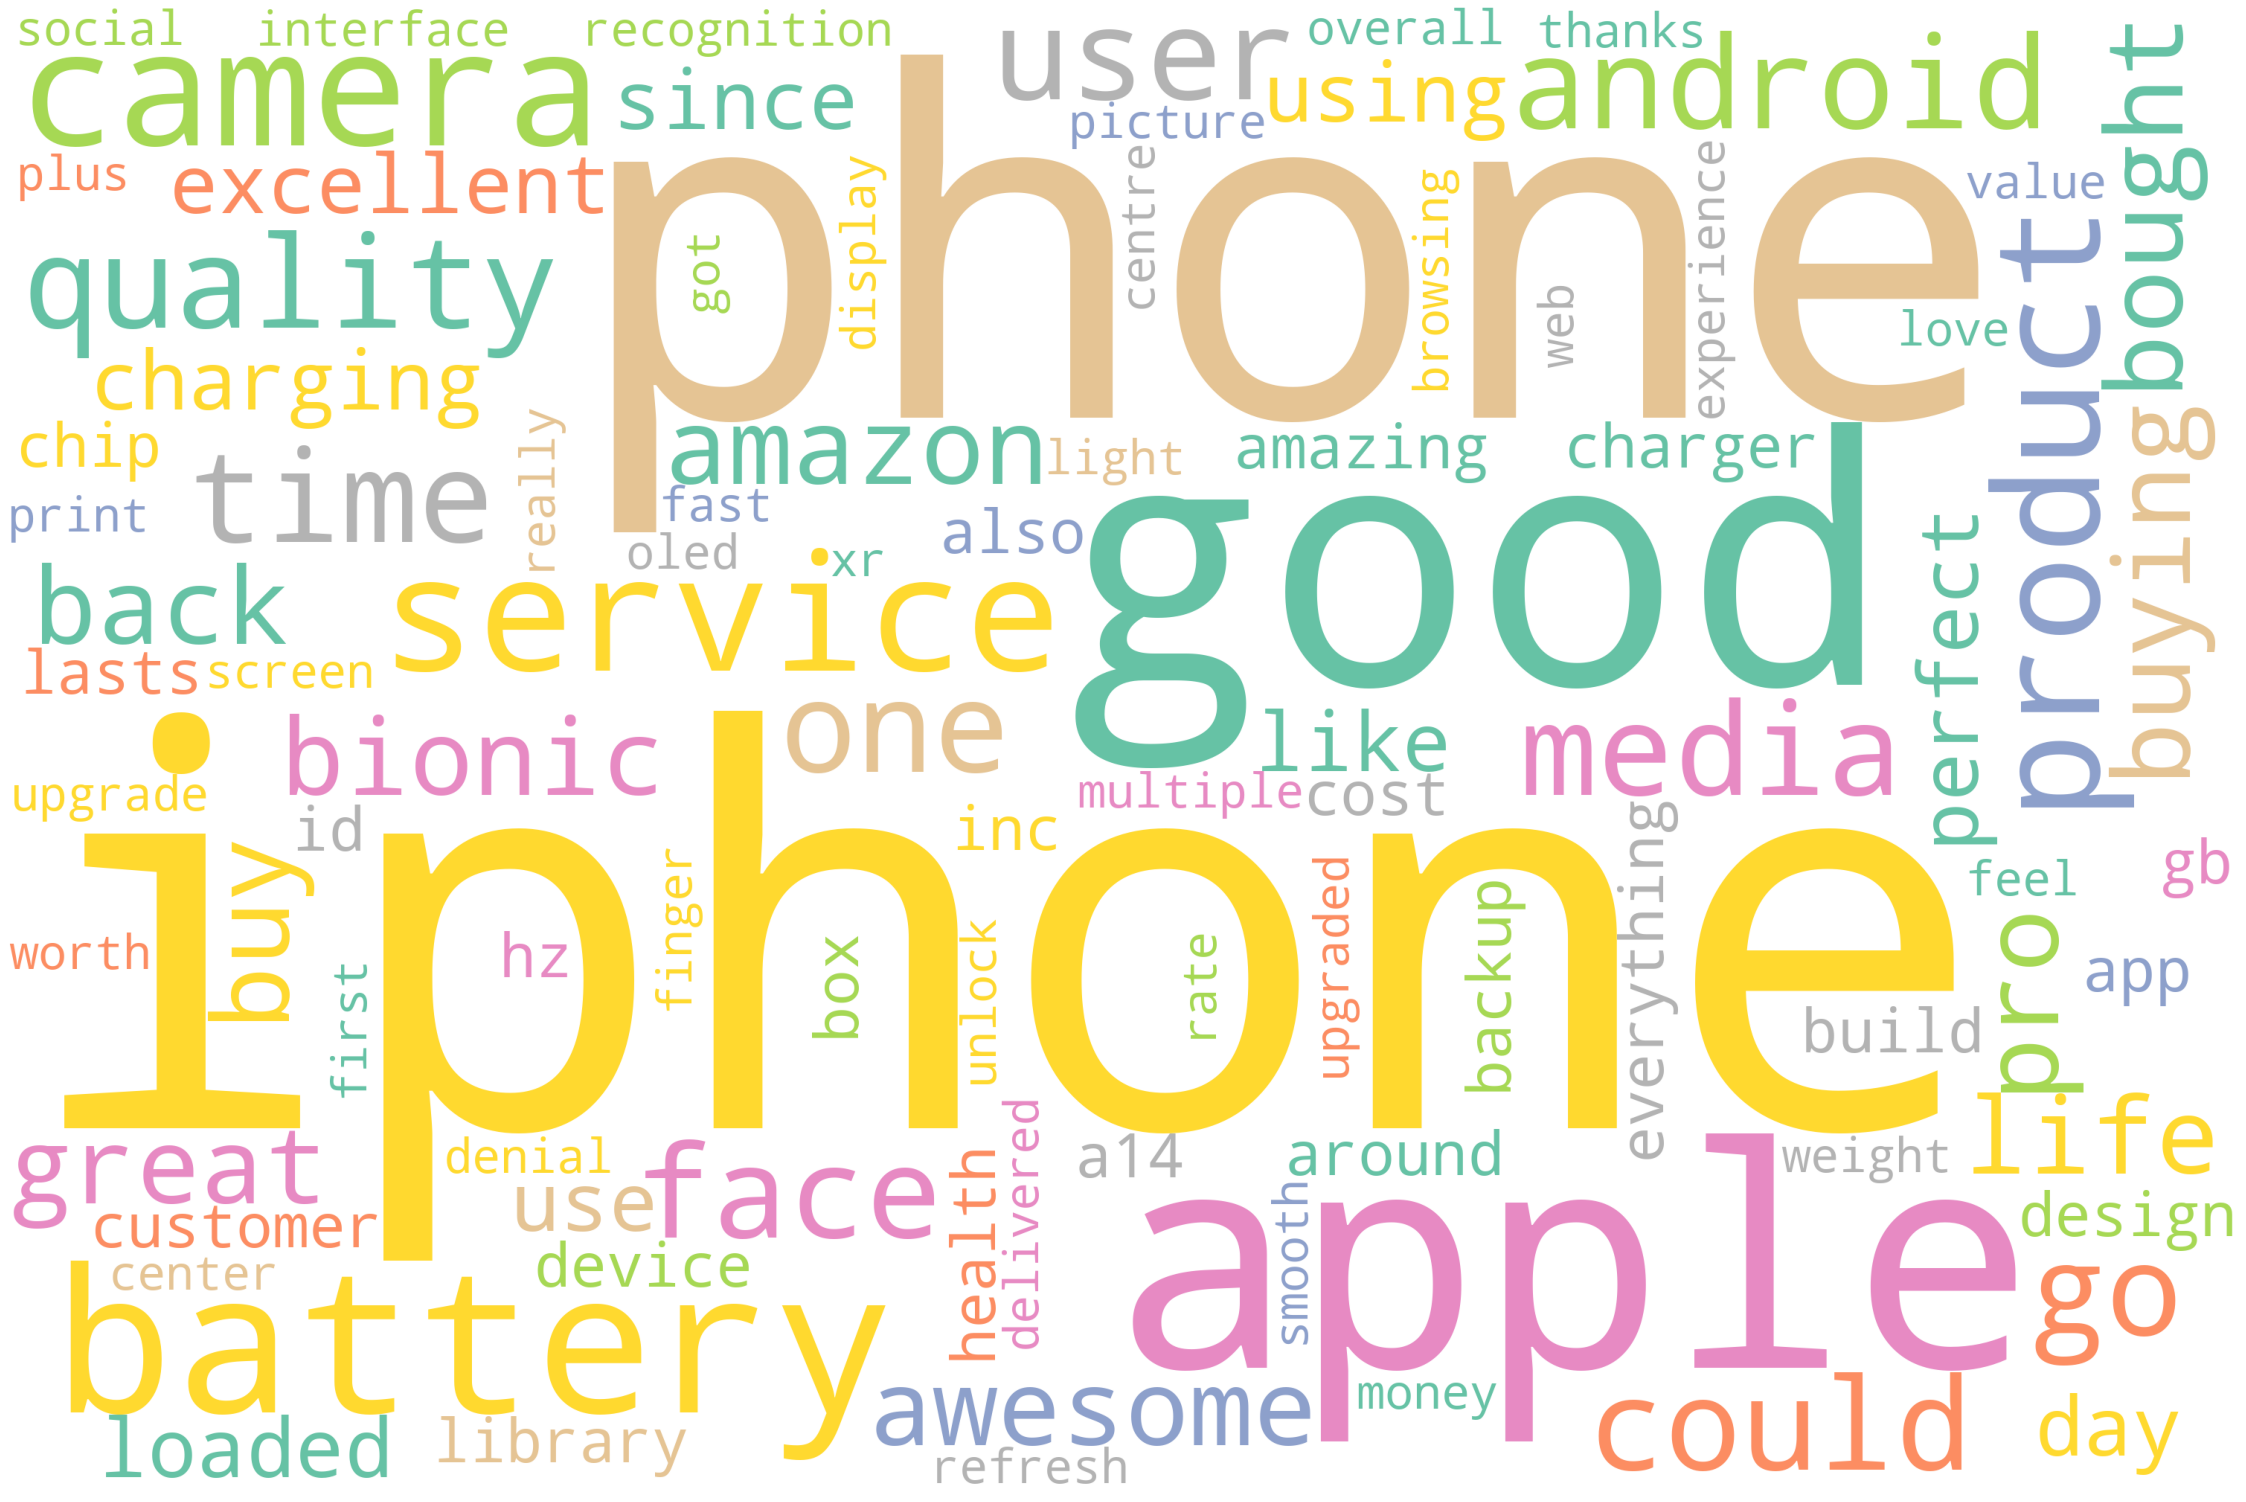

In [76]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

In [77]:
#### Emotion Mining

In [78]:
#Sentiment analysis
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [79]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [80]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [81]:
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [82]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_reviews2
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [83]:
for token in doc_block[100:200]:
   print(token,token.pos_)

iphone PROPN
go VERB
12 NUM
go VERB
back ADV
go VERB
iphone PROPN
good ADJ
battery NOUN
good ADJ
phone NOUN
good ADJ
upgrade NOUN
got VERB
phone NOUN
iphone PROPN
11 NUM
iphone PROPN
12 NUM
iphone NUM
12 NUM
phone NOUN
iphone PROPN
12 NUM
pro ADJ
iphone PROPN
13 NUM
iphone PROPN
android PROPN
iphone PROPN
since SCONJ
iphone PROPN
xr PROPN
light PROPN
weight NOUN
like SCONJ
phone NOUN
love NOUN
phone NOUN
media NOUN
could VERB
media NOUN
could VERB
loaded VERB
multiple ADJ
times NOUN
oled VERB
display NOUN
one NUM
buy NOUN
one NUM
day NOUN
one NUM
plus CCONJ
overall ADJ
good ADJ
perfect ADJ
phone NOUN
phone NOUN
awesome ADJ
phone NOUN
battery NOUN
phone NOUN
great ADJ
phone NOUN
smooth ADJ
picture NOUN
quality NOUN
product NOUN
delivered VERB
product NOUN
good ADJ
really ADV
good ADJ
refresh NOUN
rate NOUN
screen NOUN
time PROPN
service PROPN
center PROPN
service PROPN
centre PROPN
service PROPN
denial PROPN
social ADJ
media NOUN
thanks NOUN
amazon PROPN
upgraded VERB
iphone PROPN
use V

In [84]:
### only nouns and verbs are filtering
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['money', 'web', 'browsing', 'buying']


In [85]:
###### Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

In [86]:
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

In [87]:
wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,phone,12
1,battery,7
2,product,3
3,camera,3
4,quality,3
5,could,3
6,face,3
7,go,3
8,media,3
9,apple,2


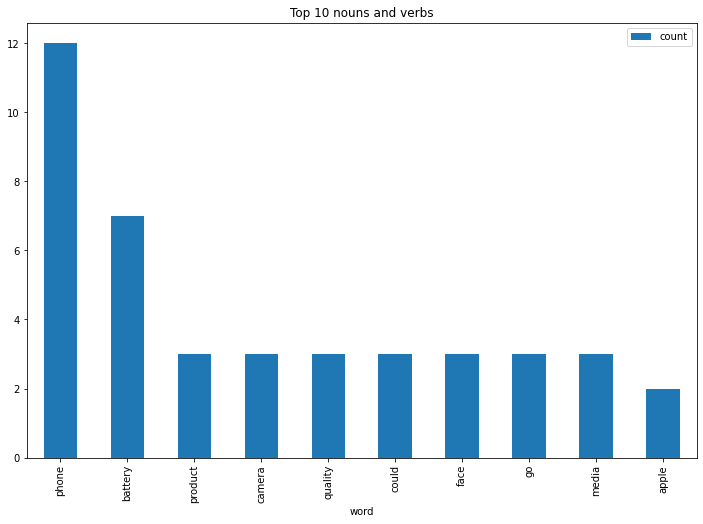

In [88]:
#####Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [89]:
#EMOTION MINING

In [90]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))


In [91]:
sentences

['I am writing this review after 40 days of use of iPhone 12. phone camera is excellent like DSLR ,very fast processor ,face ID feature looks great ,overall everything is fine but only issue which this phone has is , battery draining too fast.',
 'You can use 100% battery only for 5-6 hours of continuous use after that you have to charge it.',
 'Apple should look into this.',
 'After thinking a lot, I decided to go ahead with iPhone 12.',
 'The original price is ₹ 84900.',
 'After credit card discount(₹6000), old phone exchange(₹3450) and reward points money(₹4530) inclusion, I bought it for ₹70920.',
 'There’s also an additional 3000 discount on red and white variants but I couldn’t let go of blue1.',
 'PRICE: Considering iPhone 11 would be supported by iOS for 4 years, based on the current price it’d cost 13k per year and iPhone 12 for 5 years would cost 14.9k(excluding exchange discount) per year.',
 'For me price gap for both phones didn’t seem to make a huge difference as IPhone 1

In [92]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I am writing this review after 40 days of use ...
1,You can use 100% battery only for 5-6 hours of...
2,Apple should look into this.
3,"After thinking a lot, I decided to go ahead wi..."
4,The original price is ₹ 84900.
...,...
820,World knows it.
821,"If it fits your budget, then there is nothing ..."
822,I like very much Superb experience Nice and ge...
823,Thank you The media could not be loaded.


In [93]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [94]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [95]:
### Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

In [96]:
def calculate_sentiment(text:str=None):
        sent_score=0
        if text:
            sentence=nlp(text)
            for word in sentence:
                sent_score+=sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [97]:
#### Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      10
1       0
2       0
3       0
4       0
       ..
820     0
821     1
822     5
823     2
824     1
Name: sentiment_value, Length: 825, dtype: int64

In [98]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      44
1      19
2       5
3      12
4       6
       ..
820     3
821    12
822    13
823     8
824    58
Name: word_count, Length: 825, dtype: int64

In [99]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
587,This time i checked everywhere for 256gb iphon...,-14,48
697,I was a bit skeptical about buying iphone on a...,-10,50
71,I have to perform multiple follow ups to enqui...,-9,91
502,Kudos to you guys and yes it is assembled in I...,-7,69
186,"First of all, I don't know why people here are...",-5,34
...,...,...,...
209,ProsVery good build qualityLight WeightFits in...,15,80
363,Now I was satisfied enough with this.As time g...,16,84
378,Iphone 12 deservedly is the highest selling ph...,21,151
727,Best deal awesome camera 📸 qualityFace id is r...,21,43


In [100]:
#### Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    825.000000
mean       1.562424
std        3.275208
min      -14.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       26.000000
Name: sentiment_value, dtype: float64

In [101]:
## negative sentiment score
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,You can use 100% battery only for 5-6 hours of...,0,19
2,Apple should look into this.,0,5
3,"After thinking a lot, I decided to go ahead wi...",0,12
4,The original price is ₹ 84900.,0,6
6,There’s also an additional 3000 discount on re...,0,18
...,...,...,...
806,It looks stylish.,0,3
807,the camera quality is beyond expectations Neve...,-2,12
809,Everything is ok except a small hair scratch o...,0,12
819,No problem at all Do I need to tell anything e...,-3,11


In [102]:
#### positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I am writing this review after 40 days of use ...,10,44
5,"After credit card discount(₹6000), old phone e...",2,17
7,PRICE: Considering iPhone 11 would be supporte...,2,35
8,For me price gap for both phones didn’t seem t...,1,48
9,"Compared to iPhone 11, the iPhone 12 display i...",2,34
...,...,...,...
818,Love it .,3,3
821,"If it fits your budget, then there is nothing ...",1,12
822,I like very much Superb experience Nice and ge...,5,13
823,Thank you The media could not be loaded.,2,8


In [103]:
##### Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I am writing this review after 40 days of use ...,10,44,0
1,You can use 100% battery only for 5-6 hours of...,0,19,1
2,Apple should look into this.,0,5,2
3,"After thinking a lot, I decided to go ahead wi...",0,12,3
4,The original price is ₹ 84900.,0,6,4
...,...,...,...,...
820,World knows it.,0,3,820
821,"If it fits your budget, then there is nothing ...",1,12,821
822,I like very much Superb experience Nice and ge...,5,13,822
823,Thank you The media could not be loaded.,2,8,823


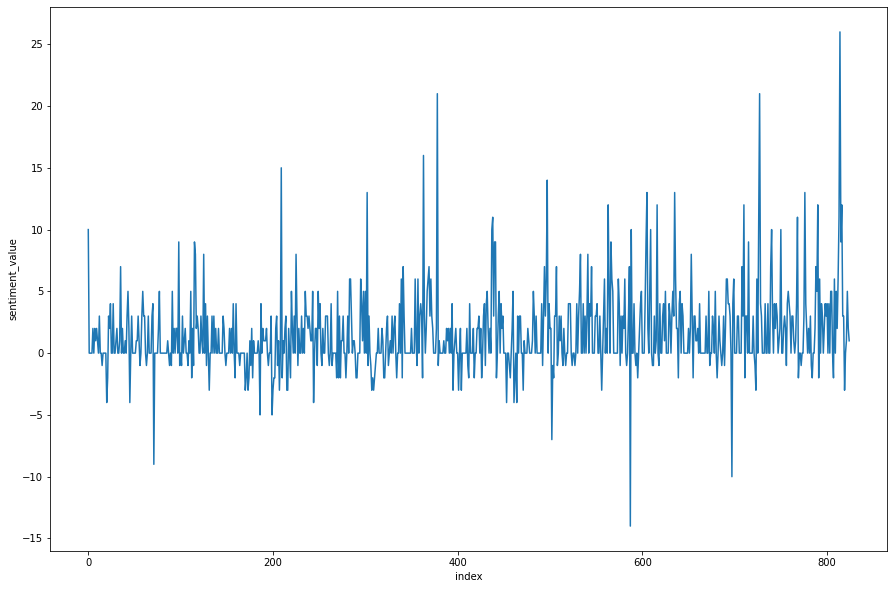

In [104]:
#### Plotting the line plot for sentiment value of whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

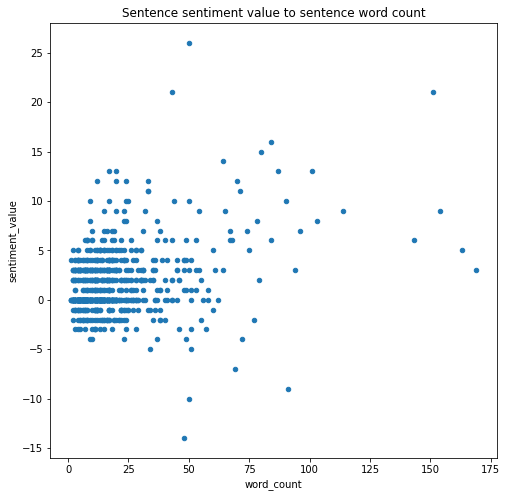

In [105]:
########Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')